<a href="https://colab.research.google.com/github/akasharts888/Python-Projects/blob/master/Image_Caption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pickle
import numpy as np
import tensorflow as tf
from tqdm.notebook import tqdm
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [2]:
Base_file = "drive/MyDrive/flickr8k"


In [3]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
print(model.summary())

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [4]:
directory = os.path.join(Base_file, "images")
print(f"Total images in directory: {len(os.listdir(directory))}")

Total images in directory: 1640


In [5]:
# Extract Features from image
features = {}
directory = os.path.join(Base_file, "images")
ids = []
for img_name in tqdm(os.listdir(directory)):
    img_path = directory + "/" + img_name
    image = load_img(img_path,target_size = (224,224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)

    feature = model.predict(image,verbose=0)
    image_id = img_name.split(".")[0]

    features[image_id] = feature
    ids.append(image_id)
    # print(image_id)

pickle.dump(features, open(os.path.join(Base_file, "features.pkl"), "wb"))


  0%|          | 0/1640 [00:00<?, ?it/s]

In [6]:
# Store Features in pickle
pickle.dump(features, open(os.path.join(Base_file, "features.pkl"), "wb"))

# Store Labels in pickle

In [7]:
# Load the captions data
with open(os.path.join(Base_file, "captions.txt"), "r") as f:
    next(f)
    captions_doc = f.read()

In [8]:
len(captions_doc)

3319280

In [9]:
# Create mapping of image to caption
mapping = {}
for line in tqdm(captions_doc.split("\n")):
    tokens = line.split(",")
    if len(line)<2:
      continue
    image_id,caption = tokens[0],tokens[1:]
    image_id = image_id.split(".")[0]
    caption = " ".join(caption)
    if image_id not in mapping:
        mapping[image_id] = []
    mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

In [10]:
len(mapping.keys())

8091

In [53]:
def clean(mapping):
  for key,caption in mapping.items():
    for i in range(len(caption)):
      caption[i] = caption[i].lower()
      caption[i] = caption[i].replace("[^A-Za-z]","")
      caption[i] = caption[i].replace("\s+"," ")
      caption[i] = "start" + " ".join([word for word in caption[i].split() if len(word)>1]) + "end"

In [54]:
mapping['1000268201_693b08cb0e']

['<start>child in pink dress is climbing up set of stairs in an entry way<end>',
 '<start>girl going into wooden building<end>',
 '<start>little girl climbing into wooden playhouse<end>',
 '<start>little girl climbing the stairs to her playhouse<end>',
 '<start>little girl in pink dress going into wooden cabin<end>']

In [55]:
print(f"Before cleaning: {len(mapping)}")
clean(mapping)
print(f"After cleaning: {len(mapping)}")


Before cleaning: 8091
After cleaning: 8091


In [56]:
filtered_mapping = {img_id: captions for img_id, captions in mapping.items() if img_id in ids}
len(filtered_mapping.keys())

1640

In [57]:
len(filtered_mapping)

1640

In [58]:
all_captions = []
for key in filtered_mapping:
  for caption in filtered_mapping[key]:
    all_captions.append(caption)

In [59]:
len(all_captions)
# all_captions[:10]

8200

In [60]:
# load features from pickle
with open(os.path.join(Base_file, "features.pkl"), "rb") as f:
    features = pickle.load(f)

In [61]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [62]:
vocab_size

4057

In [63]:
max_length = max(len(caption.split()) for caption in all_captions)
max_length

33

In [64]:
# Train test split
image_ids = list(filtered_mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]



In [65]:
len(filtered_mapping),len(features)


(1640, 1640)

In [66]:
# Create data generator to get data in batch (avoids session crash)
def datagenerator(data_keys,mapping,features,tokenizer,max_length,vocab_size,batch_size):
  X1,X2,y = list(),list(),list()
  n = 0
  while 1:
    for key in data_keys:
      n += 1
      captions = mapping[key]
      for caption in captions:
        seq = tokenizer.texts_to_sequences([caption])[0]
        for i in range(1,len(seq)):
          in_seq,out_seq = seq[:i],seq[i]
          in_seq = pad_sequences([in_seq],maxlen=max_length)[0]
          out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]
          X1.append(features[key][0])
          X2.append(in_seq)
          y.append(out_seq)
      if n == batch_size:
        X1,X2,y = np.array(X1),np.array(X2),np.array(y)
        yield (X1,X2),y
        X1,X2,y = list(),list(),list()
        n = 0




## Model Creation



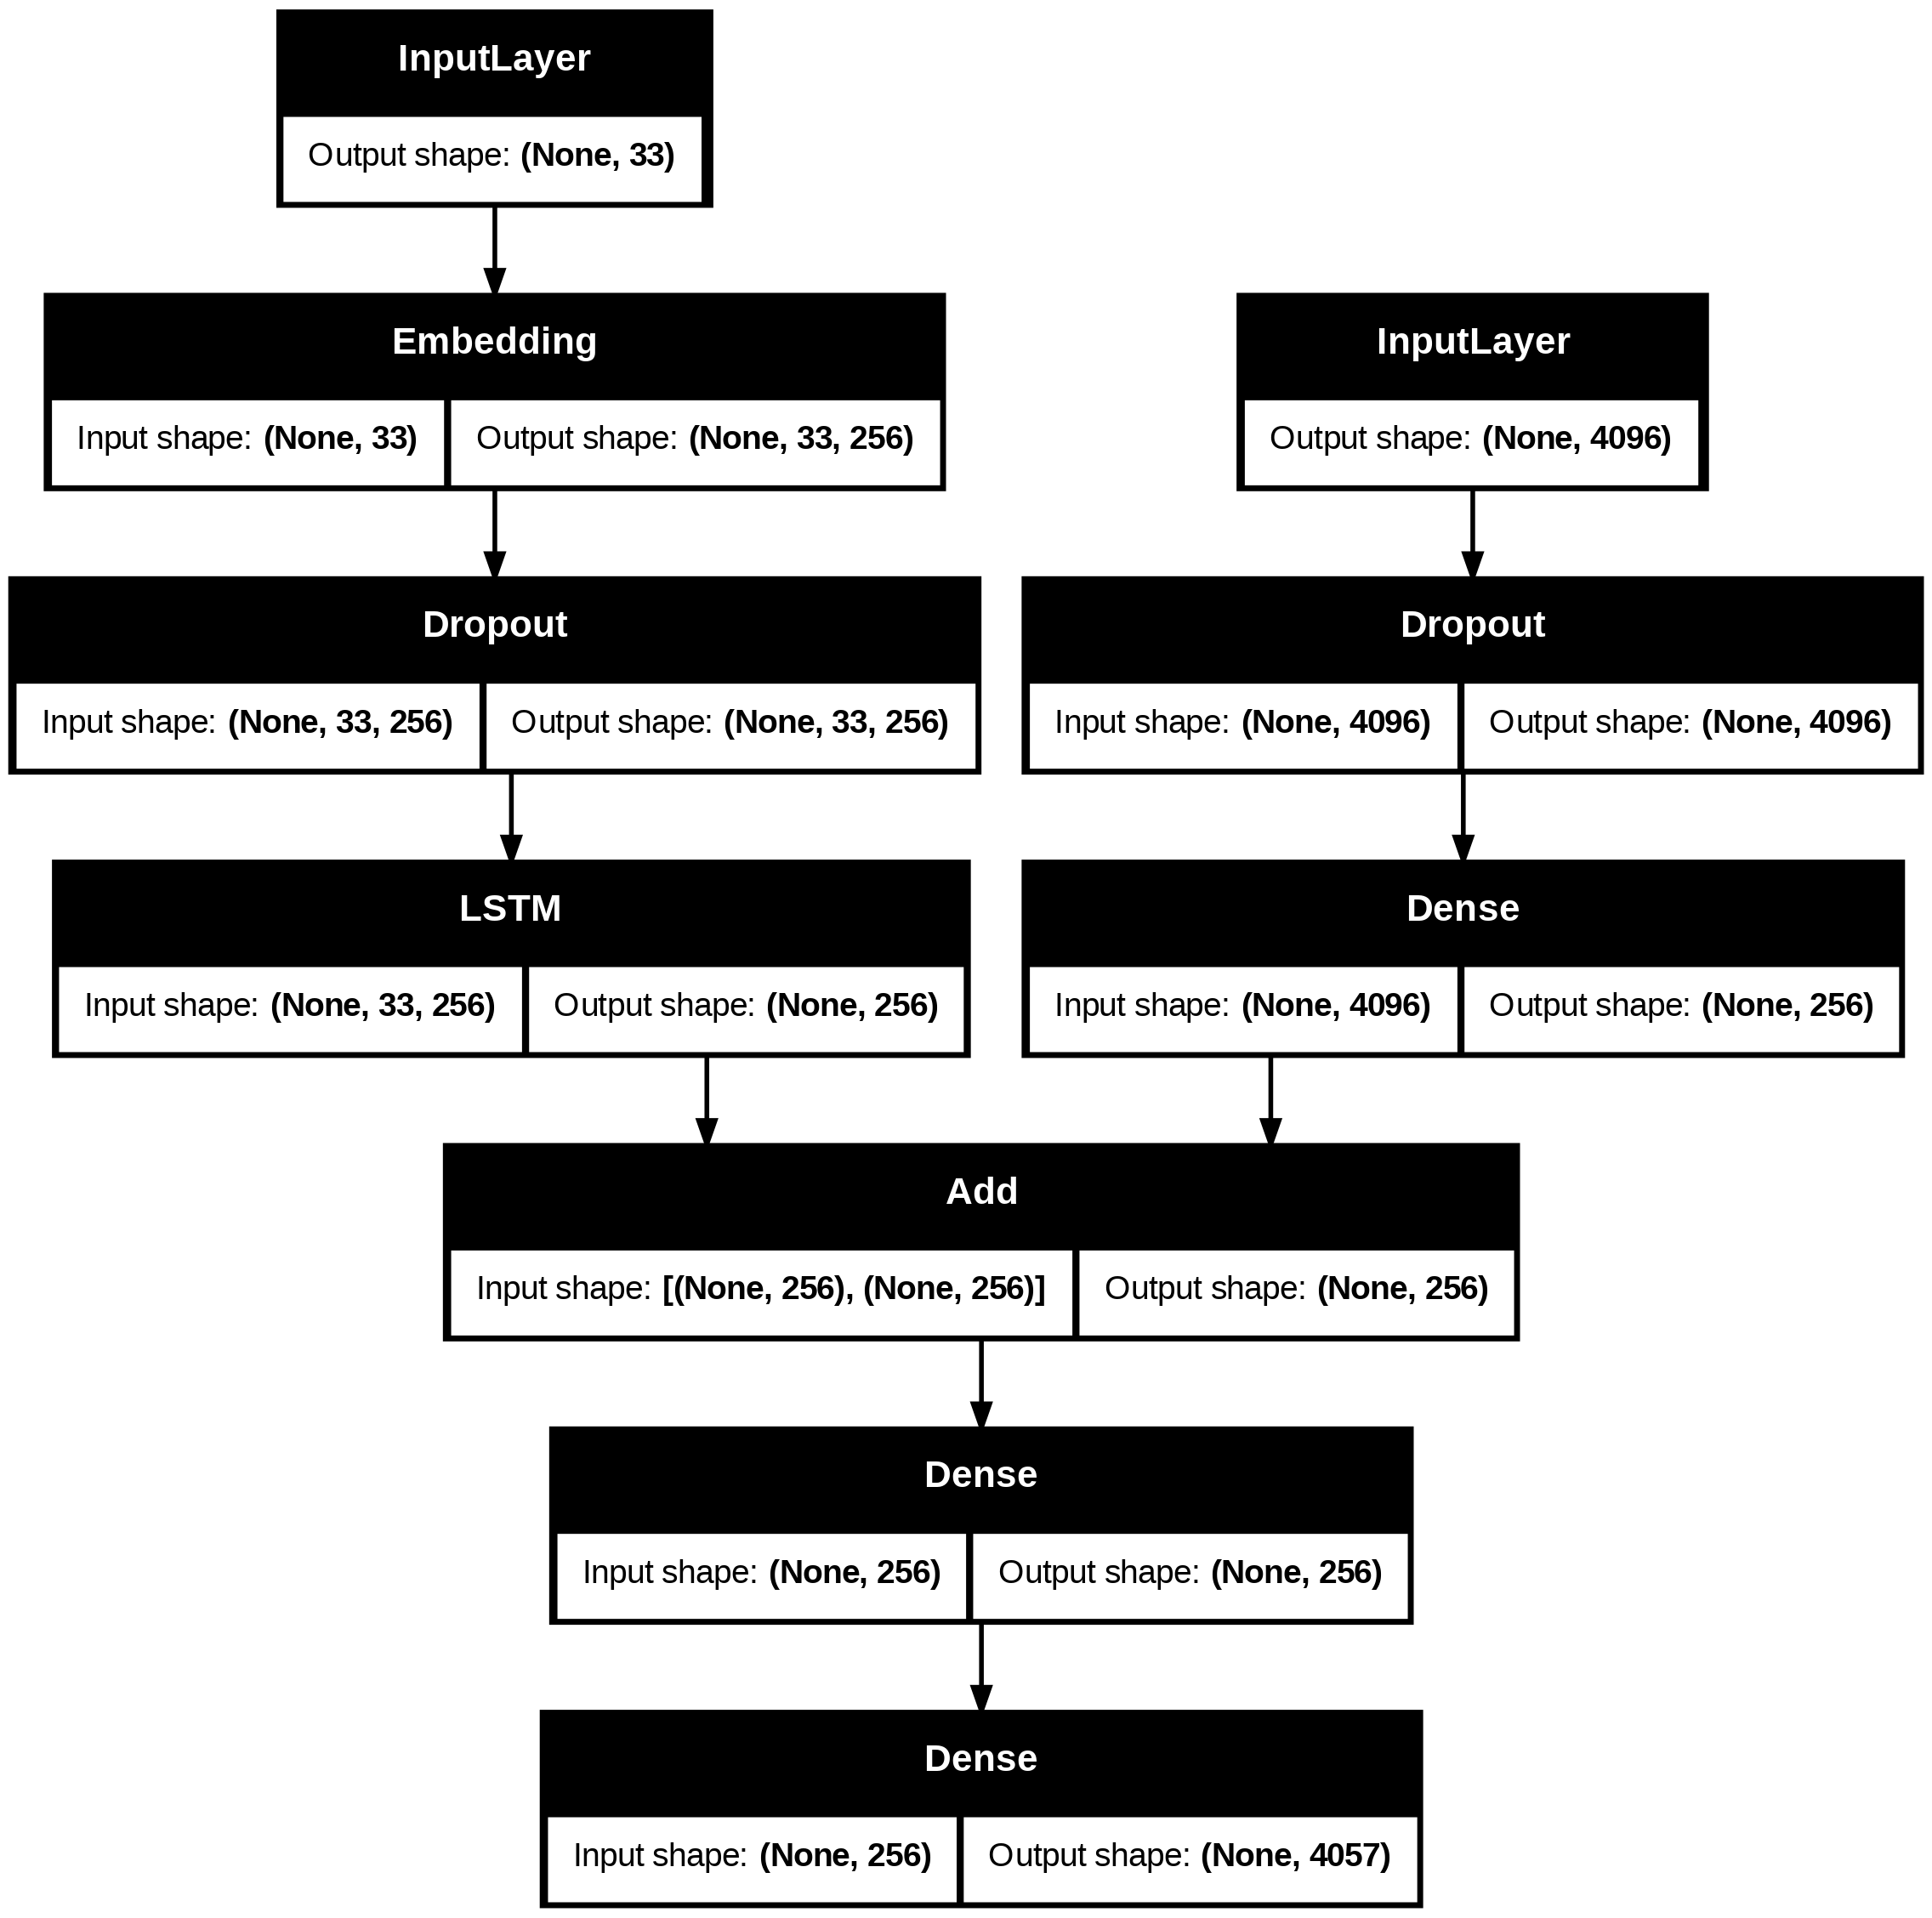

In [67]:
# Encoder Model
# Image Feature Layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256,activation="relu")(fe1)

# sequences feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size,256)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# Decoder Model
decoder1 = add([fe2,se3])
decoder2 = Dense(256,activation="relu")(decoder1)
outputs = Dense(vocab_size,activation="softmax")(decoder2)


model = Model(inputs = [inputs1,inputs2],outputs=outputs)
model.compile(loss="categorical_crossentropy",optimizer="adam")

# plot the model
plot_model(model,show_shapes=True)

In [68]:
# train the model
import tensorflow as tf
epochs = 20
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
  # Create a generator object here
  generator = datagenerator(train,filtered_mapping,features,tokenizer,max_length,vocab_size,batch_size)
  # Pass the generator object to tf.data.Dataset.from_generator
  dataset = tf.data.Dataset.from_generator(lambda: generator, output_signature=(
      (tf.TensorSpec(shape=(None, 4096), dtype=tf.float32), tf.TensorSpec(shape=(None, max_length), dtype=tf.int32)),
      tf.TensorSpec(shape=(None, vocab_size), dtype=tf.float32)
  ))
  model.fit(dataset,epochs=1,steps_per_epoch=steps,verbose=1)

46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - loss: 6.0254
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - loss: 4.3752
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - loss: 3.8829
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 178ms/step - loss: 3.4912
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - loss: 3.2009
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - loss: 2.9680
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - loss: 2.7792
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - loss: 2.6360
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - loss: 2.4993
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - loss: 2.3846
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - loss: 2.2841
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - loss: 2.2042
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - loss: 2.1233
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - loss: 2.0414
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 203ms/step - loss: 1.9708
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - loss: 1.9079
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - loss: 1.8539
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - l

In [69]:
model.save(Base_file+"/best_model.h5")

In [70]:
model.save(Base_file+"/best_model2.keras")

In [71]:
def idx_to_word(integer,tokenizer):
  for word,index in tokenizer.word_index.items():
    if index == integer:
      return word
  return None

In [72]:
# generate caption for an image
def predict_caption(model,image,tokenizer,max_length):
  in_text = "start"
  # iterate over the max length of sequences
  for i in range(max_length):
    sequence = tokenizer.texts_to_sequences([in_text])[0]
    sequence = pad_sequences([sequence],maxlen=max_length)

    yhat = model.predict([image,sequence],verbose=0)
    yhat = np.argmax(yhat)
    word = idx_to_word(yhat,tokenizer)
    if word is None:
      break
    in_text += " " + word
    if word == "end":
      break
  return in_text

In [73]:
# Validate with test data
from nltk.translate.bleu_score import corpus_bleu
actual, predicted = list(),list()

for key in tqdm(test):
  captions = filtered_mapping[key]
  y_pred = predict_caption(model,features[key],tokenizer,max_length)
  actual_captions = [caption.split() for caption in captions]
  y_pred = y_pred.split()
  actual.append(actual_captions)
  predicted.append(y_pred)

# calculate BLEU score
print("BLEU-1 : %f",corpus_bleu(actual,predicted,weights=(1.0,0,0,0)))
print("BLEU-2 : %f",corpus_bleu(actual,predicted,weights=(0.5,0.5,0,0)))

  0%|          | 0/164 [00:00<?, ?it/s]

BLEU-1 : %f 0.30363932645301467
BLEU-2 : %f 0.1592122559943443


In [74]:
test[-5:]

['2364096157_eb7970a69a',
 '2364394224_c17b09e035',
 '236474697_0c73dd5d8b',
 '236476706_175081ce18',
 '2364774105_fbaf0c191f']

## Visualizing the Results

In [75]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    image_id = image_name.split(".")[0]
    image_path = os.path.join(Base_file,"images",image_name)
    image = Image.open(image_path)
    captions = filtered_mapping[image_id]
    print("----------Actual-------------")
    for caption in captions:
      print(caption)

    y_pred = predict_caption(model,features[image_id],tokenizer,max_length)
    print("----------Predicted-------------")
    print(y_pred)
    plt.imshow(image)

----------Actual-------------
start<start>child wearing yellow jacket is jumping down from rock<end>end
start<start>kid in yellow jacket and blue baseball cap jumping from rock<end>end
start<start>young boy jumps into water<end>end
start<start>boy wearing yellow jacket jumping<end>end
start<start>little kid with yellow jacket and blue hat jumping off rock<end>end
----------Predicted-------------
start start man wearing blue jacket and yellow jacket is jumping on rock end


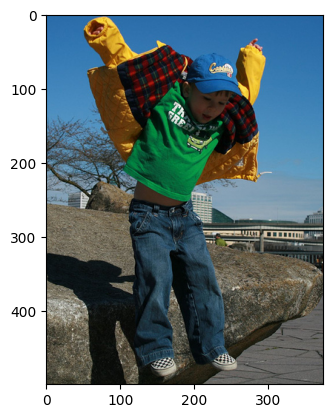

In [77]:
image_name = train[-10]
image_name = image_name + ".jpg"
generate_caption(image_name)
